In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_connect4_board(board, move_order=None):
    rows, cols = board.shape
    label_row_height = 0.8  # height for column labels

    fig, ax = plt.subplots(figsize=(cols, rows + 1))

    # Draw the game board (flip rows so row 0 is at the bottom)
    for r in range(rows):
        for c in range(cols):
            display_row = rows - 1 - r  # Flip vertically for visual

            # Blue square background
            rect = patches.Rectangle((c, display_row), 1, 1, edgecolor='blue', facecolor='blue')
            ax.add_patch(rect)

            # Determine disc appearance
            cell = board[r, c]
            if cell == 0:
                facecolor = 'white'
                edgecolor = 'black'
                linewidth = 1
            elif cell == 1:
                facecolor = 'red'
                edgecolor = 'black'
                linewidth = 1
            elif cell == 2:
                facecolor = 'yellow'
                edgecolor = 'black'
                linewidth = 1
            elif cell == 3:
                facecolor = 'red'
                edgecolor = 'cyan'
                linewidth = 3
            elif cell == 4:
                facecolor = 'yellow'
                edgecolor = 'cyan'
                linewidth = 3

            # Draw disc
            circle = patches.Circle((c + 0.5, display_row + 0.5), 0.4,
                                    facecolor=facecolor, edgecolor=edgecolor, linewidth=linewidth)
            ax.add_patch(circle)

            # Draw move number, if present
            if move_order is not None:
                move_num = move_order[display_row, c]
                if move_num > 0:
                    ax.text(c + 0.5, r + 0.5, str(move_num), color='black', ha='center', va='center', fontsize=17, weight='bold')            

    # Draw label row below the board
    label_y_bottom = -label_row_height
    label_y_top = 0
    label_color = "#2b45ca"  # soft blue
    label_rect = patches.Rectangle((0, label_y_bottom), cols, label_row_height,
                                   facecolor=label_color, edgecolor='none')
    ax.add_patch(label_rect)

    # Short white tick marks between columns
    for c in range(1, cols):
        ax.plot([c, c], [label_y_bottom, label_y_bottom + label_row_height * 0.7],
                color='white', linewidth=1, alpha=0.7)

    # Column numbers
    for c in range(cols):
        ax.text(c + 0.5, label_y_bottom + label_row_height / 2, str(c + 1),
                va='center', ha='center', fontsize=20, fontweight='bold', color='white')

    # Final layout
    ax.set_xlim(0, cols)
    ax.set_ylim(label_y_bottom, rows)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

    return fig

### MCS classic opening

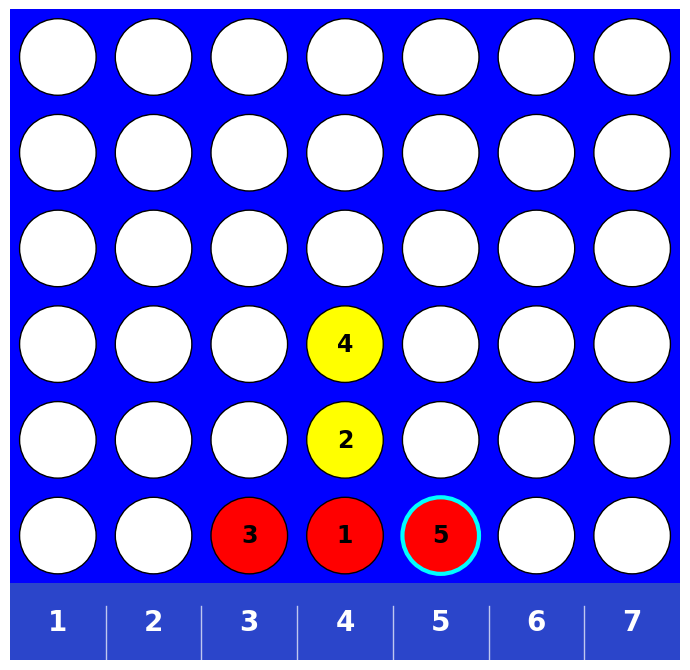

In [ ]:
# Example board
board_state = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 2, 0, 0, 0],
    [0, 0, 0, 2, 0, 0, 0],
    [0, 0, 1, 1, 3, 0, 0],
])

move_order = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4, 0, 0, 0],
    [0, 0, 0, 2, 0, 0, 0],
    [0, 0, 3, 1, 5, 0, 0],
])

fig = draw_connect4_board(board_state, move_order)
fig.savefig("figures/mcs-classic-opening.png")